In [1]:
from models import BiLSTM
import modal
import torch 
import lab
import numpy as np

In [2]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import matplotlib.pyplot as plt

In [13]:
%matplotlib notebook

In [11]:
# Sample data
x = [i for i in range(100)]
y = [i**2 for i in range(100)]

# Create the main plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Create the inset axes with zoom factor 2
axins = zoomed_inset_axes(ax, zoom=2, loc='upper right')
axins.plot(x, y)
axins.set_xlim(20, 40)  # Limit the x-axis range for the inset
axins.set_ylim(400, 1600)  # Limit the y-axis range for the inset

# Hide ticks on the inset
axins.xaxis.set_visible(False)
axins.yaxis.set_visible(False)

# Draw lines to indicate the zoomed area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.savefig('./Figs/inset.pdf')
# Show plot
plt.show()

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 640x480 with 2 Axes>

In [2]:
vel_binary_model_norm = torch.load('./Models/lstm_velocity_binary_norm.pth')
vel_binary_model = torch.load('./Models/lstm_velocity_binary.pth')

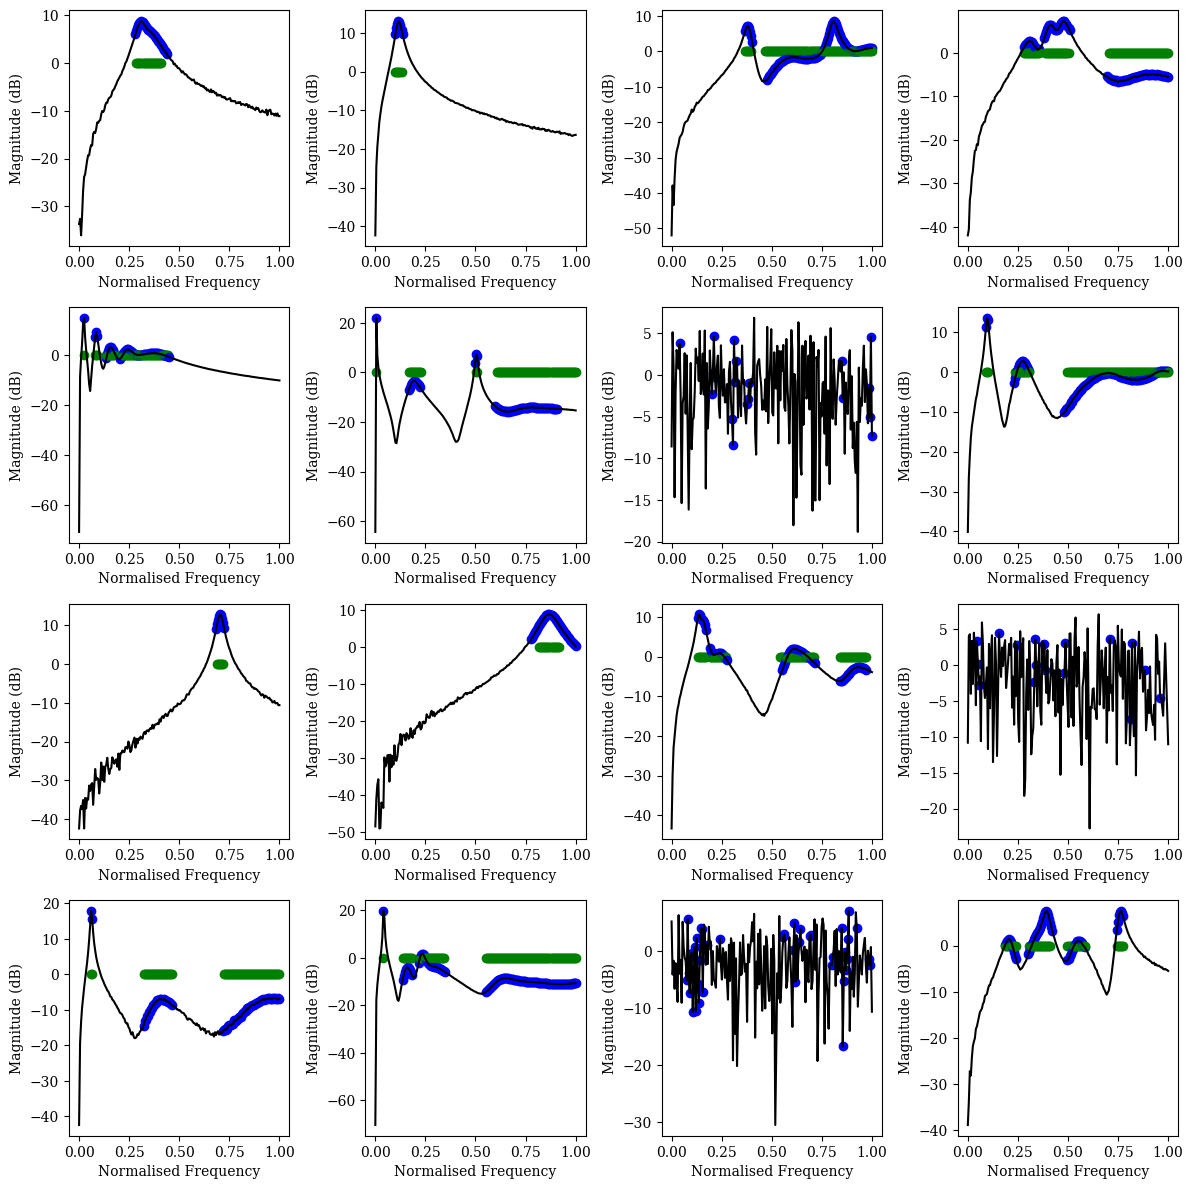

In [5]:
modal.validate_model(vel_binary_model_norm, multiclass=False, normalise = modal.normalise_rms)

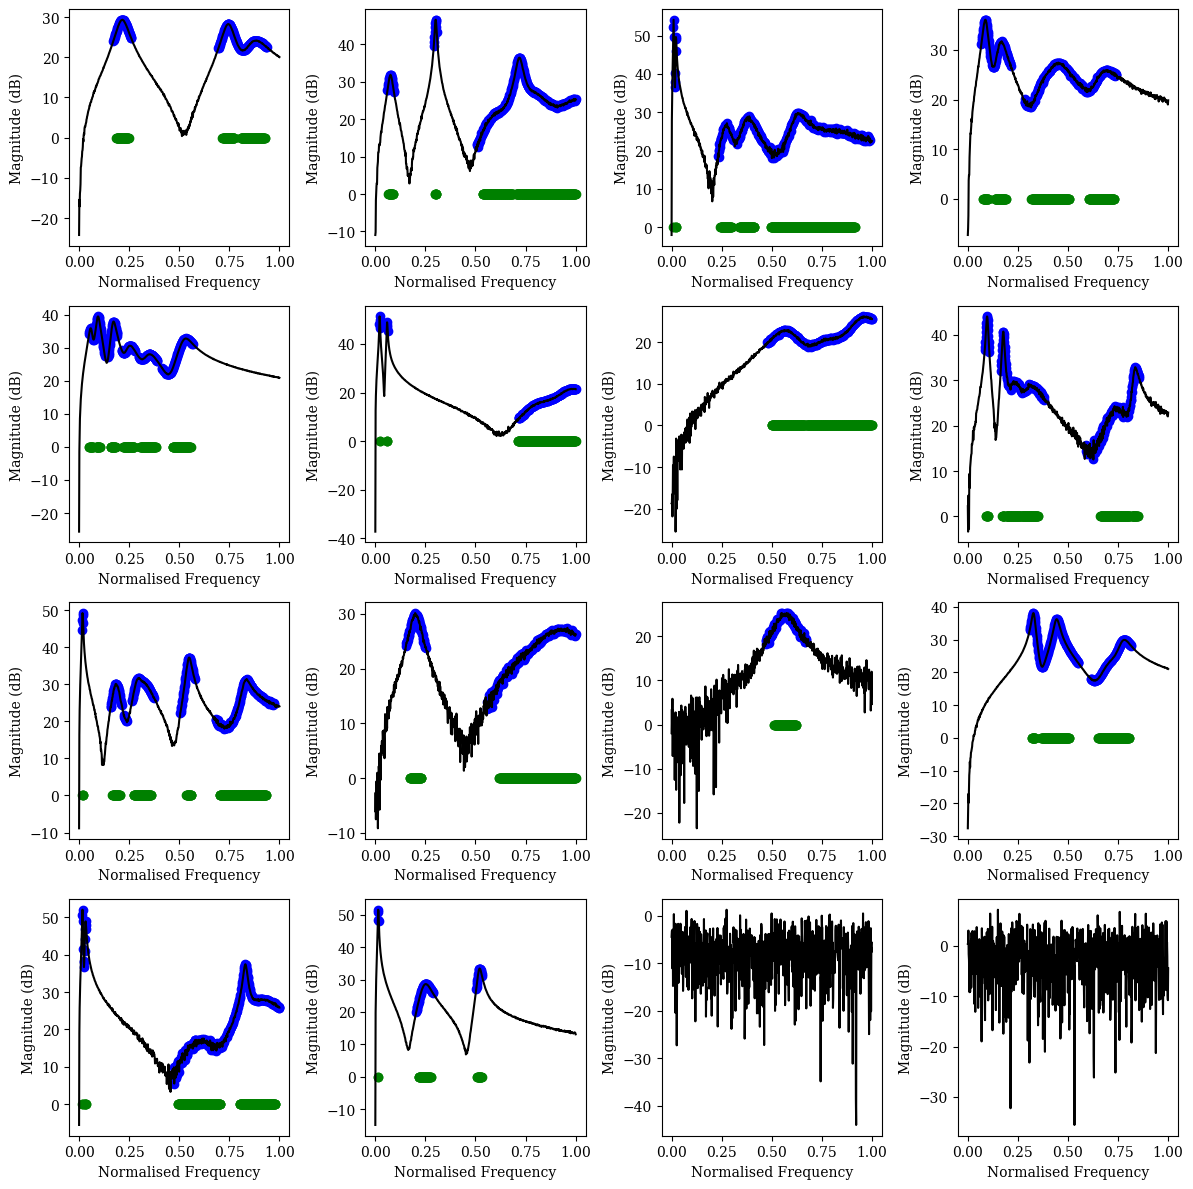

In [5]:
modal.validate_model(vel_binary_model, multiclass=False, normalise = None, nrows=4, ncols=4, num_w_points=700, sigma_max=0.7)

In [2]:
input_size = 2
hidden_size = 50
num_layers = 3
num_classes = 1 # multi class classification

In [3]:
test_model = BiLSTM(input_size, hidden_size, num_layers, num_classes)
modal.train(num_batches = 400, num_w_points = 400, model = test_model,
            num_epochs=15, sigma_max=0.5, normalise=modal.normalise_rms,
            name='lstm_velocity_short(19.11)')

Epoch [1/15], Loss: 0.9676423311233521, Precision: 0.5772056474620633, Recall: 0.49548190369225964
Validation Precision: 0.7041402688368685, Validation Recall: 0.8256297360470006
Epoch [2/15], Loss: 0.7647669248282909, Precision: 0.7211231725556496, Recall: 0.6077384015455585
Validation Precision: 0.7179140787065803, Validation Recall: 0.9568704375138952
Epoch [3/15], Loss: 0.6427712944149971, Precision: 0.7913806863296504, Recall: 0.6389550582493014
Validation Precision: 0.8054982846133627, Validation Recall: 0.9416642540230744
Epoch [4/15], Loss: 0.5815478283911943, Precision: 0.8337024979282708, Recall: 0.6536683082504543
Validation Precision: 0.8767214273224727, Validation Recall: 0.9369403425781998
Epoch [5/15], Loss: 0.5375950129330158, Precision: 0.8655407649744667, Recall: 0.6640180789002617
Validation Precision: 0.9256916418349027, Validation Recall: 0.9153859292388744
Epoch [6/15], Loss: 0.5146671255677938, Precision: 0.8838215451245358, Recall: 0.6694753644188046
Validation 

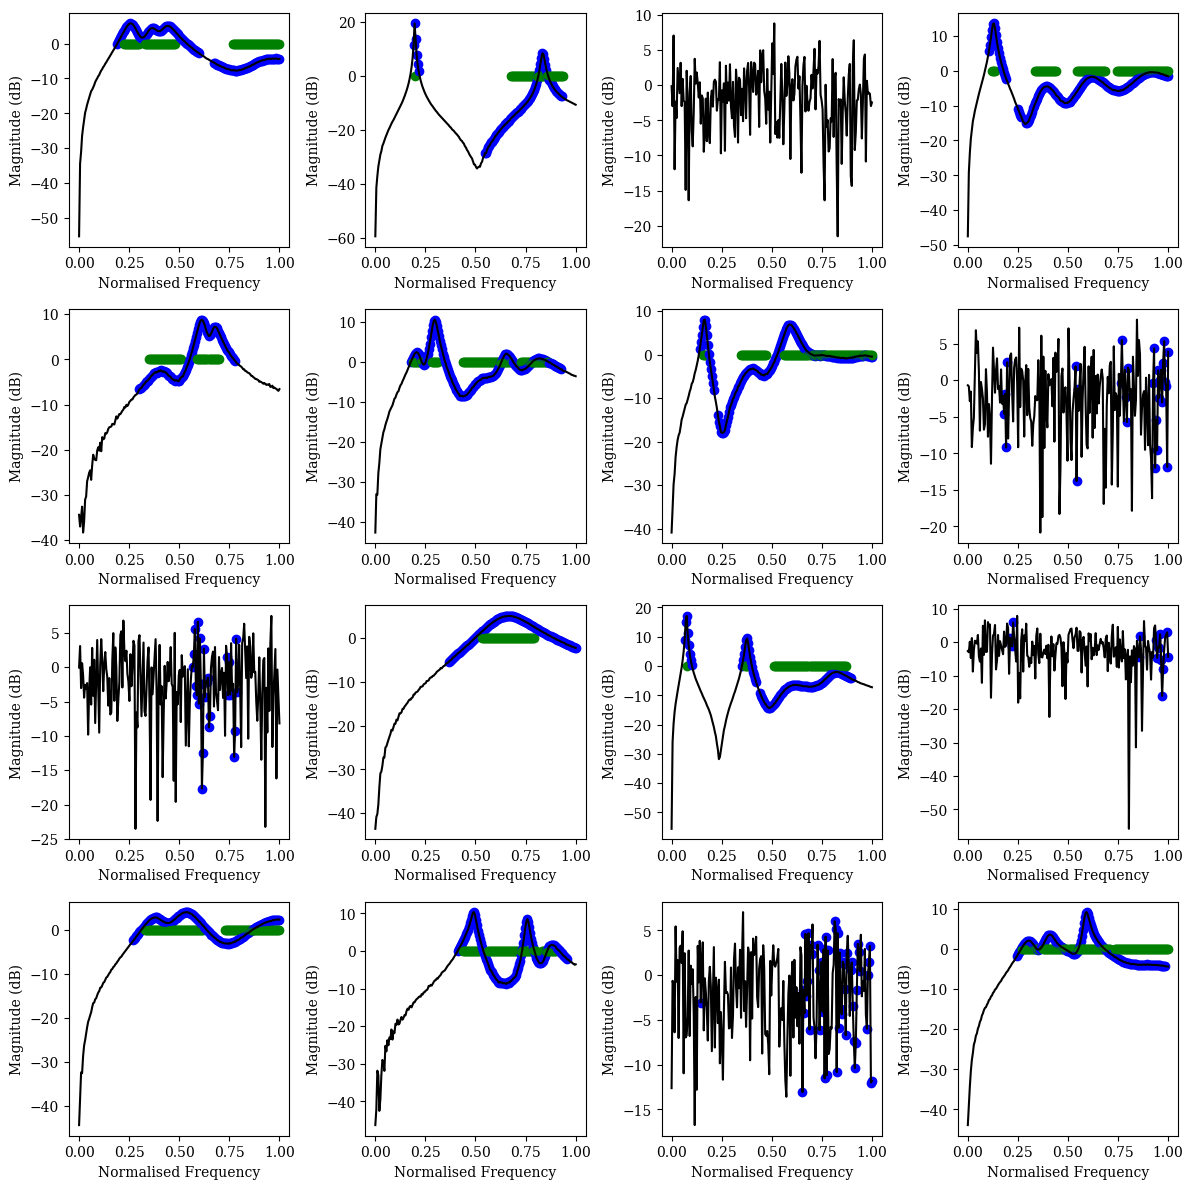

In [7]:
test_model = torch.load('lstm_velocity_short(19.11).pth')
modal.validate_model(test_model, multiclass=False, normalise = modal.normalise_rms)

In [2]:
input_size = 2
hidden_size = 100
num_layers = 2
num_classes = 1 # multi class classification

In [6]:
test_model_2 = BiLSTM(input_size, hidden_size, num_layers, num_classes)
modal.train(num_batches = 400, num_w_points = 400, model = test_model_2,
            num_epochs=15, sigma_max=0.5, normalise=modal.normalise_rms,
            name='lstm_velocity_short2(19.11)')

Epoch [1/15], Loss: 0.9230966021120548, Precision: 0.61637481137488, Recall: 0.5079958217016306
Validation Precision: 0.8616005029432262, Validation Recall: 0.7512263128277652
Epoch [2/15], Loss: 0.6492085810750723, Precision: 0.7937163257947135, Recall: 0.6372957848266063
Validation Precision: 0.7475608254737963, Validation Recall: 0.9592170626806988
Epoch [3/15], Loss: 0.5913414524495602, Precision: 0.8338290653688416, Recall: 0.6496641500573542
Validation Precision: 0.8640892238246443, Validation Recall: 0.9431398057739466
Epoch [4/15], Loss: 0.5485550199449062, Precision: 0.8639044922550244, Recall: 0.6589363367917023
Validation Precision: 0.900543589365721, Validation Recall: 0.9300624625377975
Epoch [5/15], Loss: 0.6766172233223915, Precision: 0.8048994897384466, Recall: 0.6190700089825257
Validation Precision: 0.9039469142857481, Validation Recall: 0.8569657663802837
Epoch [6/15], Loss: 0.5688973145931959, Precision: 0.8474691446587572, Recall: 0.6536645547147402
Validation Prec

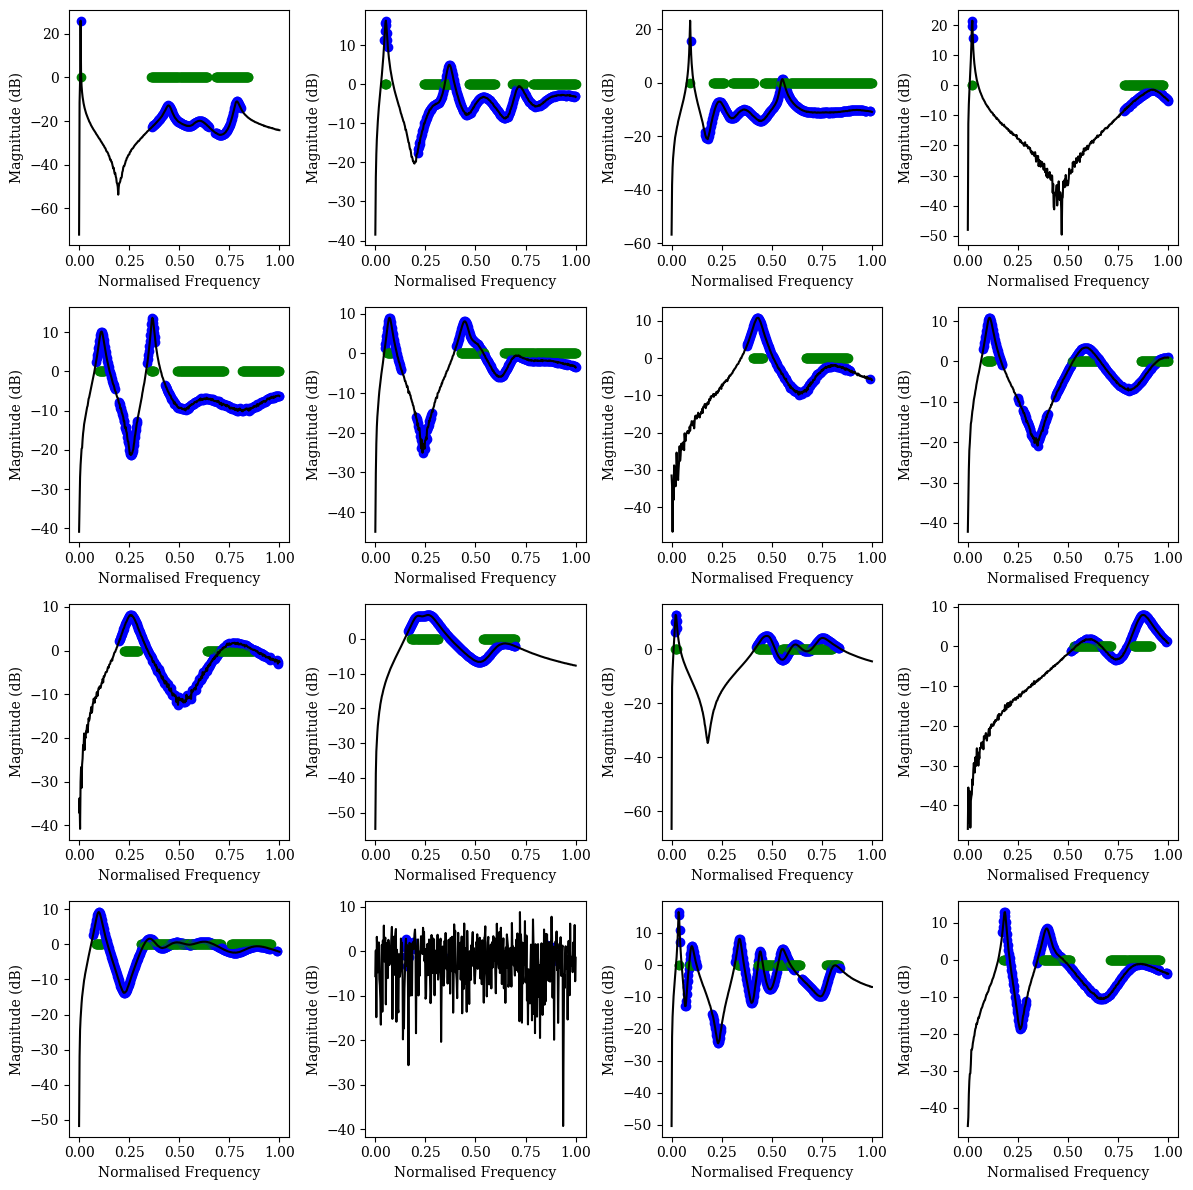

In [8]:
test_model_2 = torch.load('lstm_velocity_short2(19.11).pth')
modal.validate_model(test_model_2, multiclass=False, normalise = modal.normalise_rms, num_w_points=400)

In [3]:
lab_data = lab.load_data()

2023-11-19 23:38:34.934 python[85567:7675802] +[CATransaction synchronize] called within transaction
2023-11-19 23:38:35.002 python[85567:7675802] +[CATransaction synchronize] called within transaction


In [5]:
test_model = torch.load('lstm_velocity_short(19.11).pth')

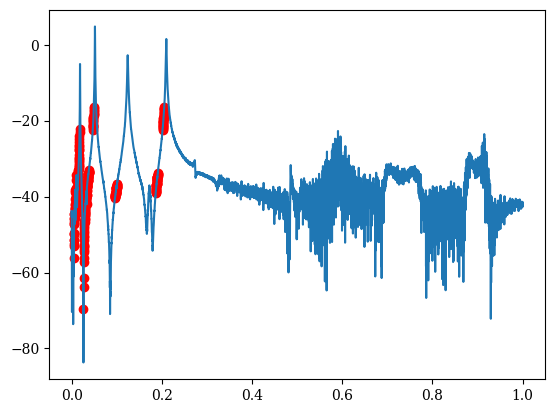

In [15]:
lab.lab_predictions(test_model_2, lab_data, normalise=modal.normalise_rms)
# lab.lab_predictions(vel_binary_model, lab_data, normalise=None)

In [2]:
batchnorm = BiLSTM(input_size=2, hidden_size=100, num_layers=3, num_classes=1)
modal.train(num_batches = 600, num_w_points = 200, model = batchnorm,
            num_epochs=70, sigma_max=0.3, normalise=modal.normalise_rms,
            name='lstm_batchnorm(19.11)')

Epoch [1/70], Loss: 0.9620962679386139, Precision: 0.544390622391294, Recall: 0.5393258953061636
Validation Precision: 0.7199340536273576, Validation Recall: 0.7197650393551039
Epoch [2/70], Loss: 0.7400991021593412, Precision: 0.6892944762850454, Recall: 0.6272315963038958
Validation Precision: 0.5234348922876277, Validation Recall: 0.9543581328870506
Epoch [3/70], Loss: 0.6234660697480042, Precision: 0.7774928934832651, Recall: 0.6523822710182439
Validation Precision: 0.8988407218582313, Validation Recall: 0.7752241666764614
Epoch [4/70], Loss: 0.5723882696032524, Precision: 0.8204114842888591, Recall: 0.6624139064371651
Validation Precision: 0.810368024466293, Validation Recall: 0.9661379437547989
Epoch [5/70], Loss: 0.5447871846954028, Precision: 0.8432569902500404, Recall: 0.6675680482781512
Validation Precision: 0.9097908158053581, Validation Recall: 0.8924513102547167
Epoch [6/70], Loss: 0.5264075735211372, Precision: 0.8585062119524015, Recall: 0.6710264481031039
Validation Pre

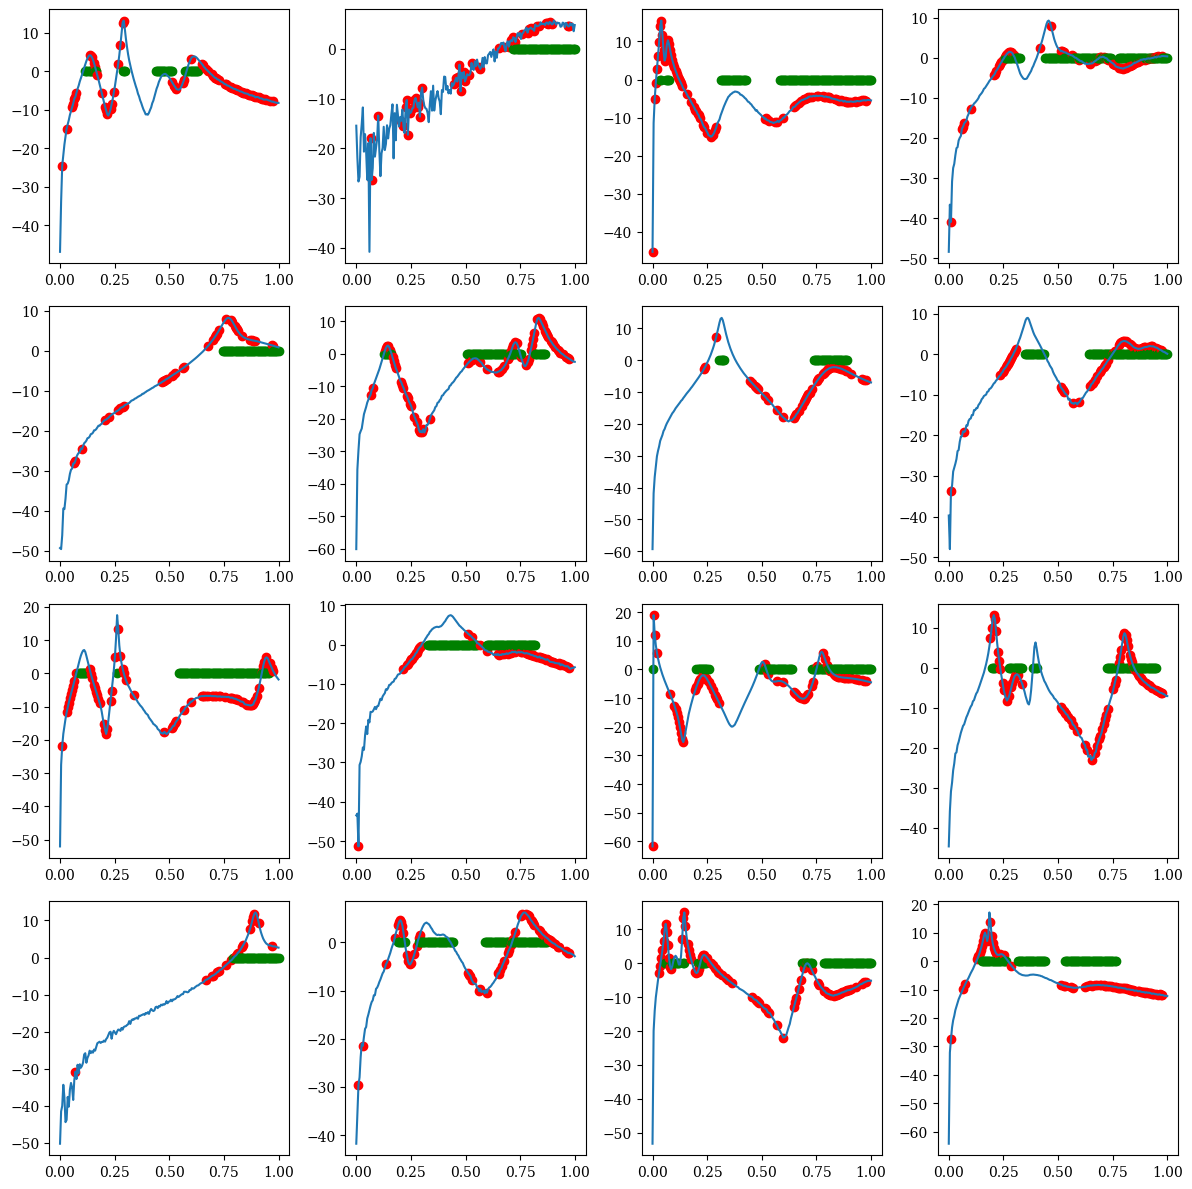

In [4]:
modal.validate_model(batchnorm, multiclass=False, normalise = modal.normalise_rms, num_w_points=200)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Normalised Frequency', ylabel='Magnitude (dB)'>)

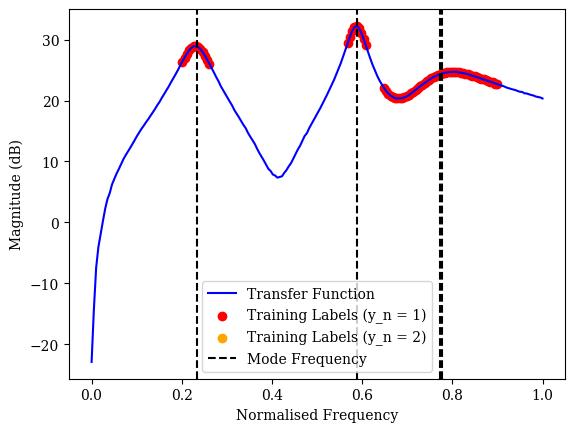

In [4]:
X,y,ws,zs = modal.generate_data(num_data=1, num_w_points=200, sigma_max=0.1, max_modes=5, normalise=None)
modal.plot_tf(X[0], y[0], ws=ws[0])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Normalised Frequency', ylabel='Magnitude (dB)'>)

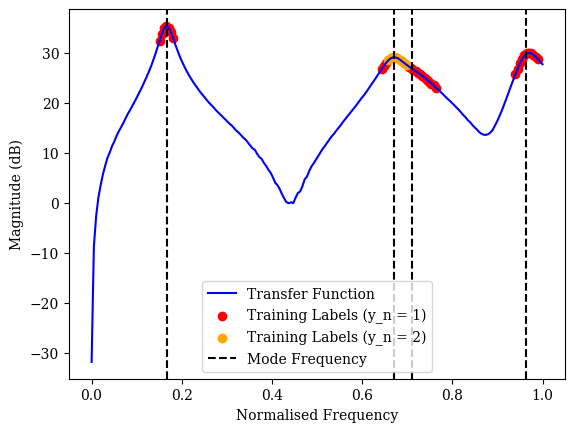

In [11]:
X,y,ws,zs = modal.generate_data(num_data=1, num_w_points=200, sigma_max=0.1, max_modes=5, normalise=None, multiclass=True)
modal.plot_tf(X[0], y[0], ws=ws[0])

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [107]:
X, y, _, __ = modal.generate_data(num_data=1, num_w_points=200, sigma_max=0.1, max_modes=3, normalise=None, multiclass=False)
w = np.linspace(0, 1, 200)


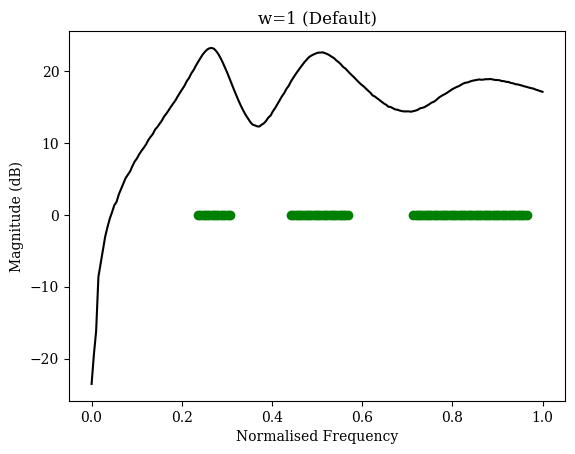

In [129]:
fig, ax = plt.subplots()
ax.plot(w, modal.to_db(X).reshape(-1), c='black')
predicted = np.zeros_like(w)
targets = y.reshape(-1)
for i in range(len(w)):
    if i==0:
        if predicted[i] == 1:
            ax.scatter(w[i], modal.to_db(X)[i], c='blue', marker='o', label = 'Model Predictions')
        if targets[i] == 1:
            ax.scatter(w[i], 0, c='green', marker='o', label='Training Labels (y_n = 1)')
    else:
        if predicted[i] == 1:
            ax.scatter(w[i], modal.to_db(X)[i], c='blue', marker='o')
        if targets[i] == 1:
            ax.scatter(w[i], 0, c='green', marker='o')
ax.set_xlabel('Normalised Frequency')
ax.set_ylabel('Magnitude (dB)')
plt.title('w=1 (Default)')
plt.show()

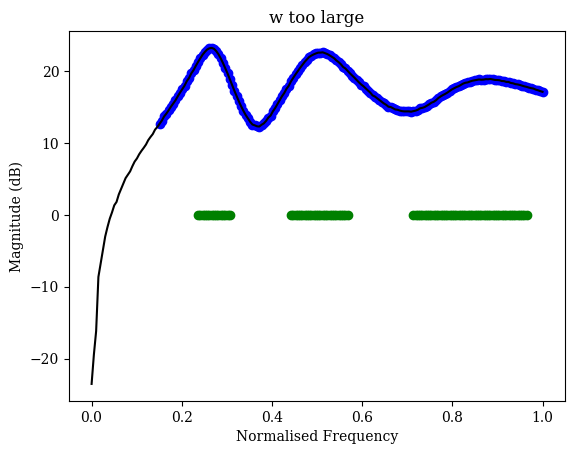

In [137]:
fig, ax = plt.subplots()
ax.plot(w, modal.to_db(X).reshape(-1), c='black')
predicted = [1] * 200
predicted[:30] = [0] * 30
targets = y.reshape(-1)
for i in range(len(w)):
    if i==0:
        if predicted[i] == 1:
            ax.scatter(w[i], modal.to_db(X).reshape(-1)[i], c='blue', marker='o', label = 'Model Predictions')
        if targets[i] == 1:
            ax.scatter(w[i], 0, c='green', marker='o', label='Training Labels (y_n = 1)')
    else:
        if predicted[i] == 1:
            ax.scatter(w[i], modal.to_db(X).reshape(-1)[i], c='blue', marker='o')
        if targets[i] == 1:
            ax.scatter(w[i], 0, c='green', marker='o')
ax.set_xlabel('Normalised Frequency')
ax.set_ylabel('Magnitude (dB)')
plt.title('w too large')
plt.show()

In [10]:
test_arr = np.random.randn(200,2)
print(test_arr.shape)
print(np.linalg.norm(test_arr, axis=0).shape)

(200, 2)
(2,)


In [ ]:
lstm_norm = BiLSTM(input_size=2, hidden_size=100, num_layers=3, num_classes=1)
modal.train(num_batches = 500, num_w_points = 200, model = lstm_norm,
            num_epochs=3, sigma_max=0.3, normalise=modal.normalise_rms,
            name='lstm_norm(27.11)')

In [3]:
X, y, ws, __ = modal.generate_data(num_data=32*300, num_w_points=200, neg_an=True)  # sigma_max = 0.15, max_modes = 7 (defaults)
valX, valy, _, __ = modal.generate_data(num_data=32*50, num_w_points=200, neg_an=True)

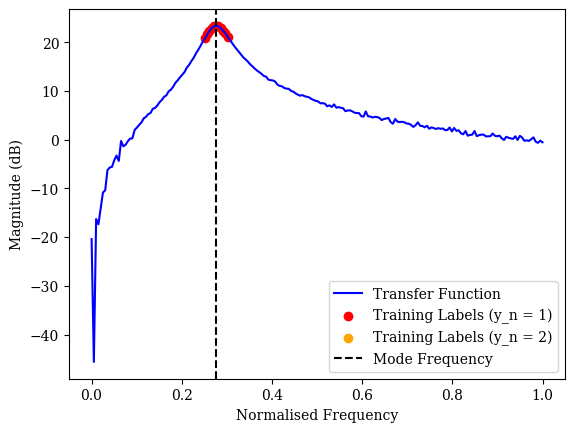

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Normalised Frequency', ylabel='Magnitude (dB)'>)

In [12]:
idx = np.random.randint(0, X.shape[0])
modal.plot_tf(X[idx], y[idx], ws=ws[idx], todb=True)